In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import io
import requests
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

In [2]:
df=pd.read_csv('loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df=df.dropna()


In [6]:
df.count()

Loan_ID              480
Gender               480
Married              480
Dependents           480
Education            480
Self_Employed        480
ApplicantIncome      480
CoapplicantIncome    480
LoanAmount           480
Loan_Amount_Term     480
Credit_History       480
Property_Area        480
Loan_Status          480
dtype: int64

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


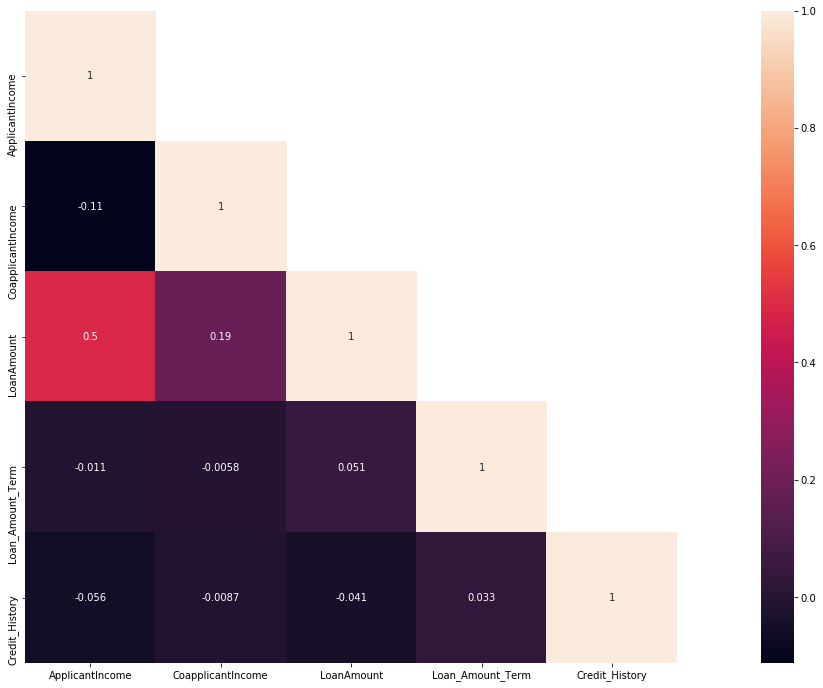

In [8]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

C:\Users\GT\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


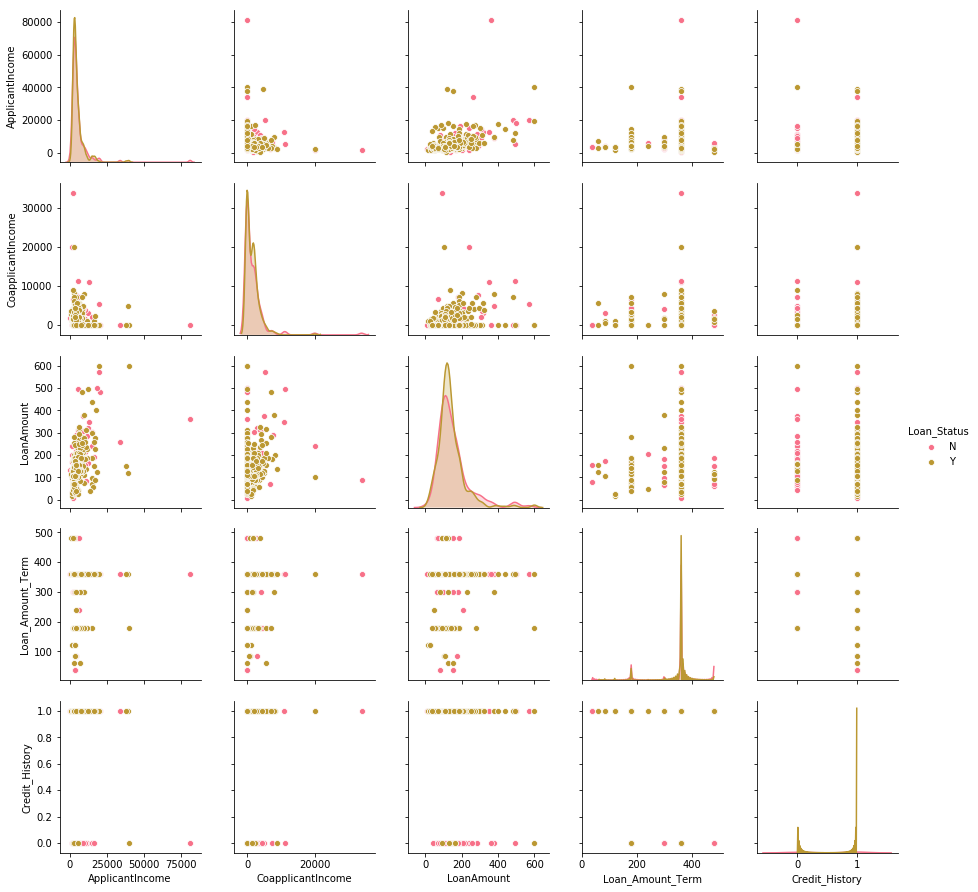

In [9]:
sns.pairplot(df,hue='Loan_Status',
             palette = sns.color_palette("husl"), size=2.5)

C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


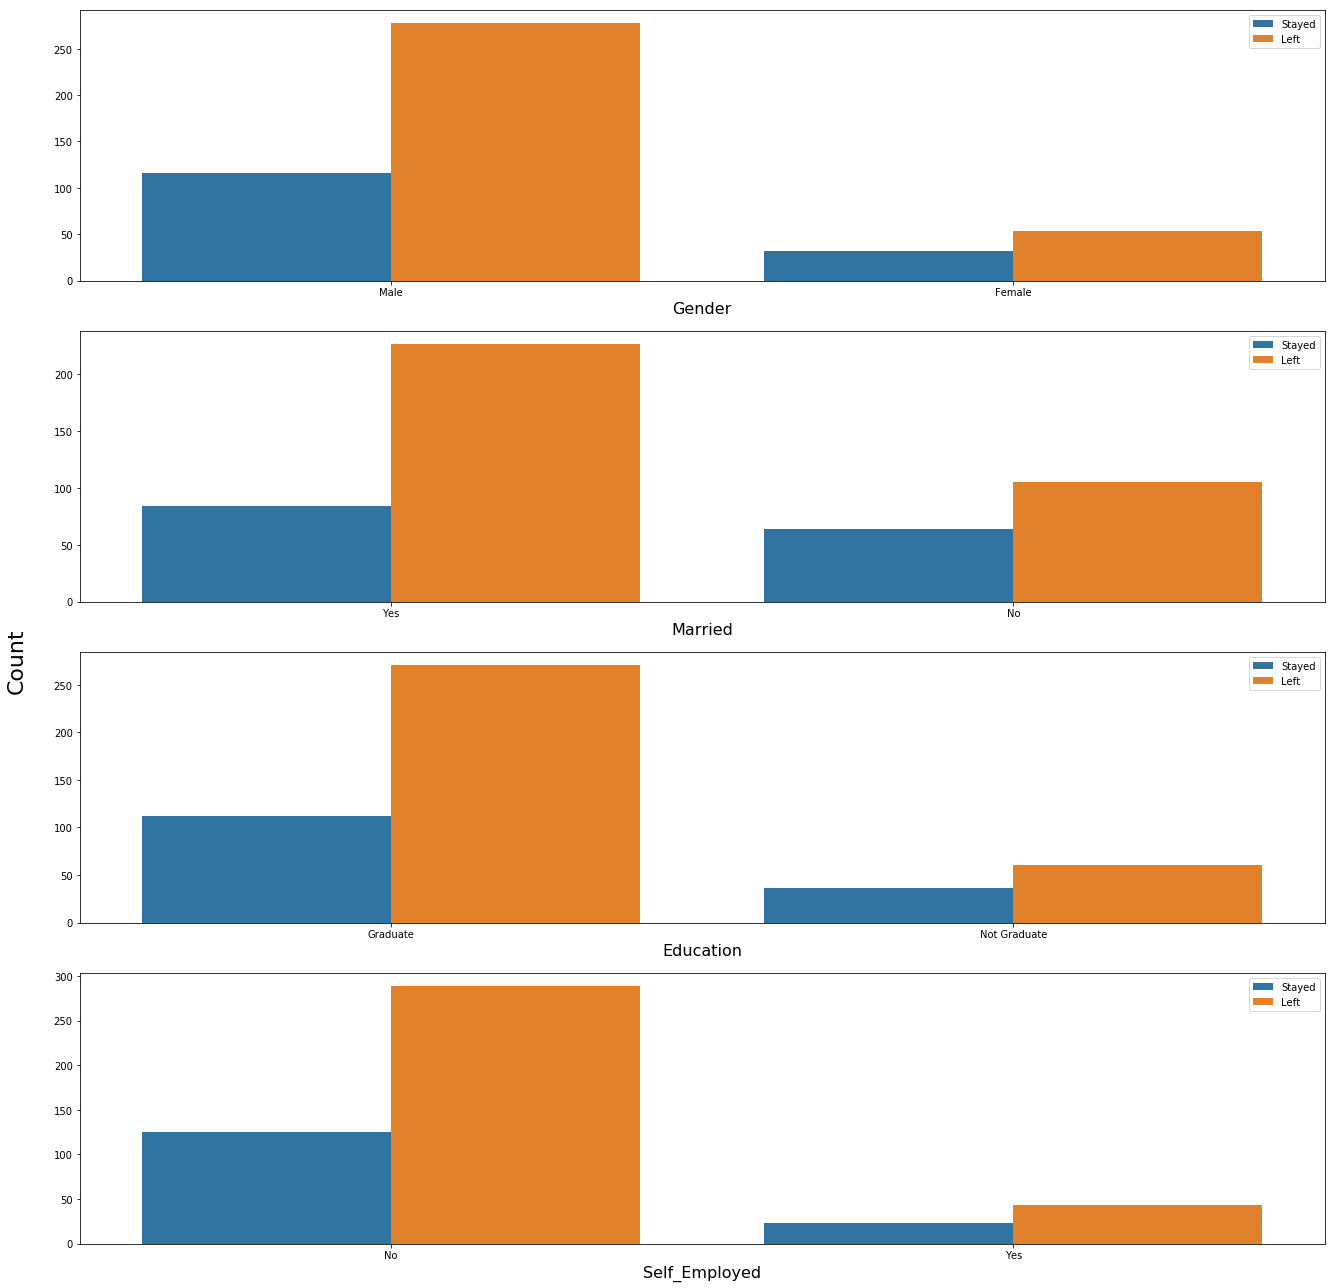

In [10]:
f, axes = plt.subplots(4, 1, figsize=(18,18), tight_layout=True)
x_vars = ['Gender', 'Married', 'Education', 'Self_Employed','ApplicationIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
for ax, x in zip(axes, x_vars):
    sns.countplot(x=x, hue='Loan_Status', data=df, ax=ax)
    ax.set_xlabel(x, size=16)
    ax.set_ylabel("")
    ax.legend(['Stayed', 'Left'])

f.text(x=-0.0275, y=0.5, s='Count', rotation=90, size=22)
plt.show()

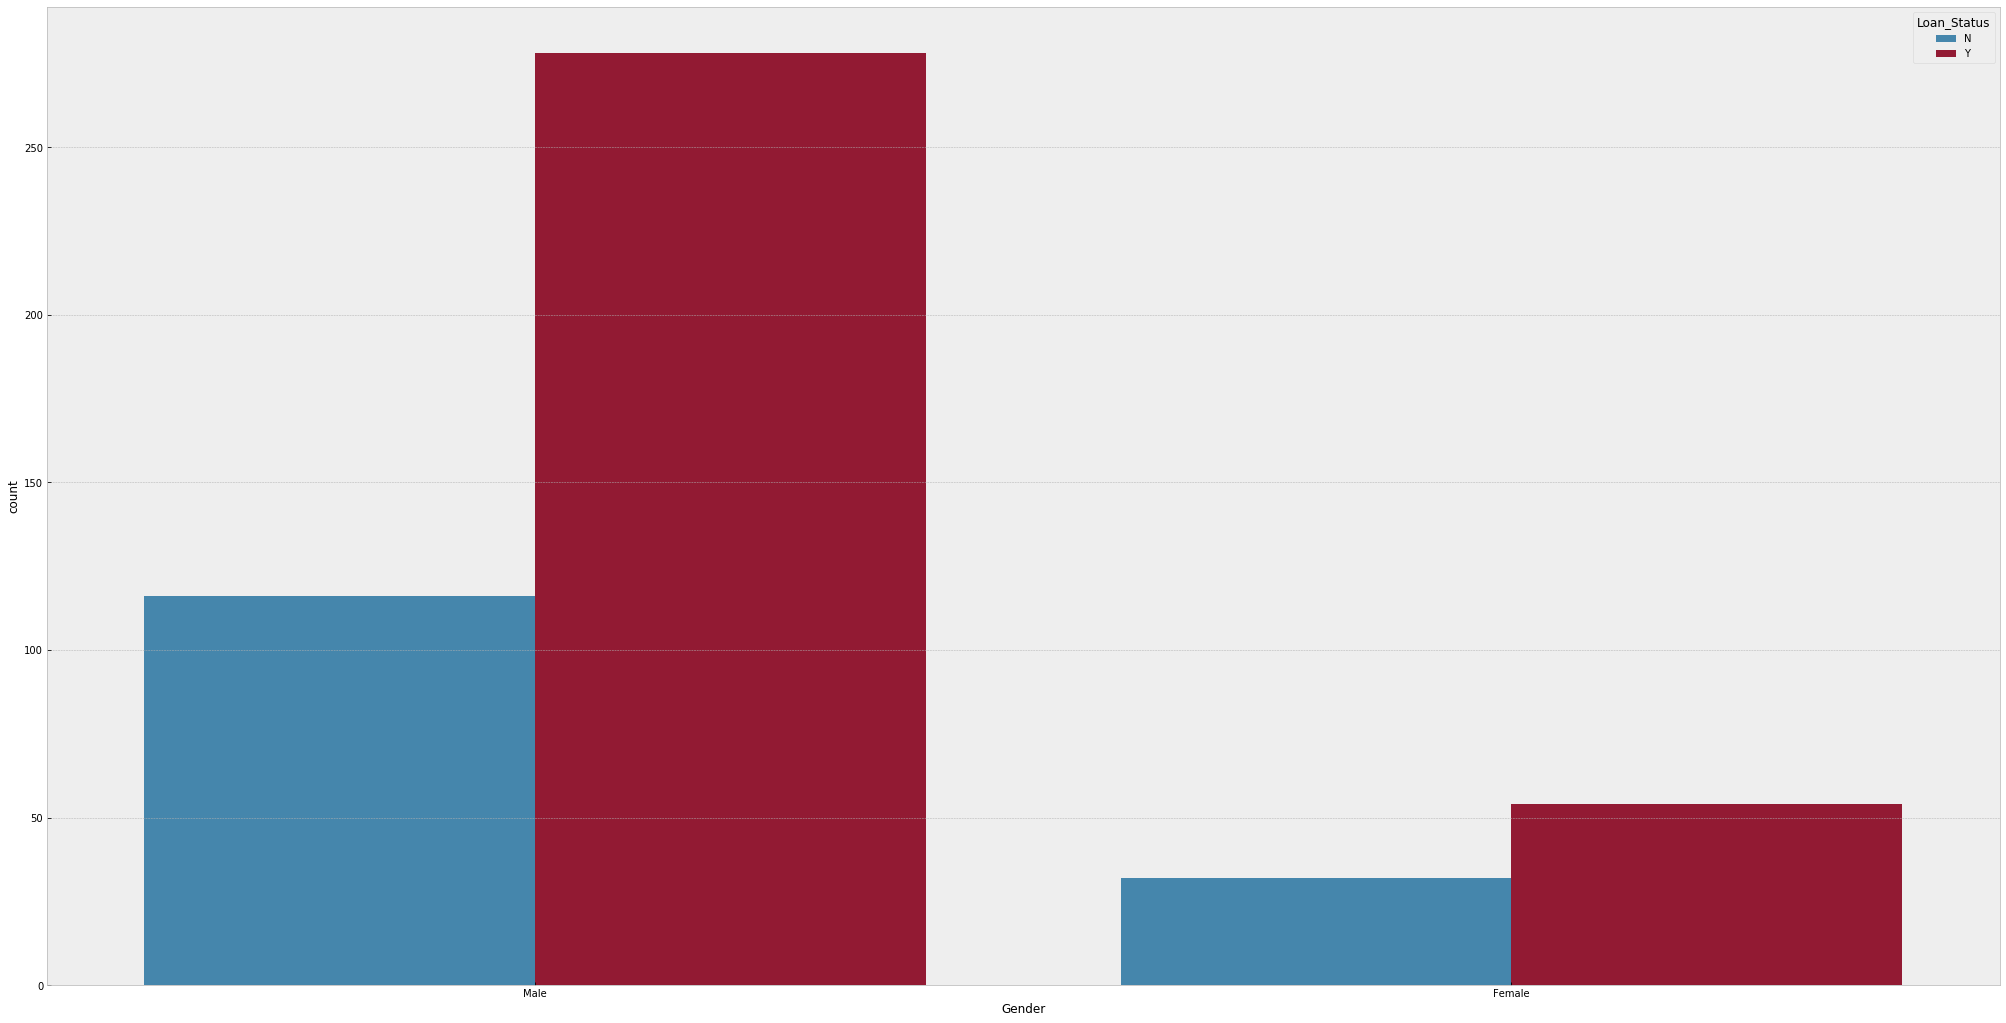

In [11]:
plt.figure(figsize=(35, 18))
plt.style.use('bmh')

sns.countplot(x='Gender', hue='Loan_Status', data=df)

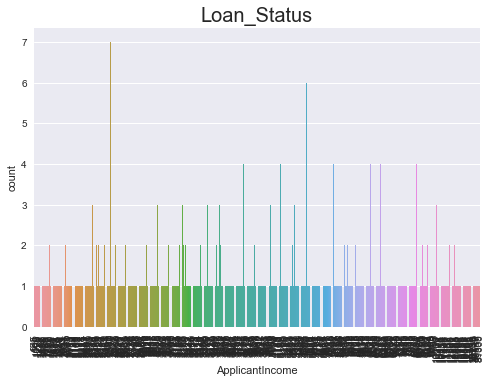

In [12]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

sns.countplot(df['ApplicantIncome'])

plt.title('Loan_Status', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

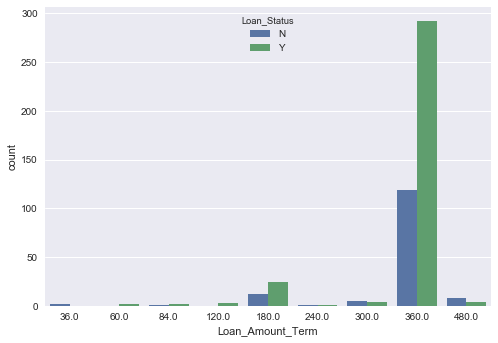

In [13]:
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=df)

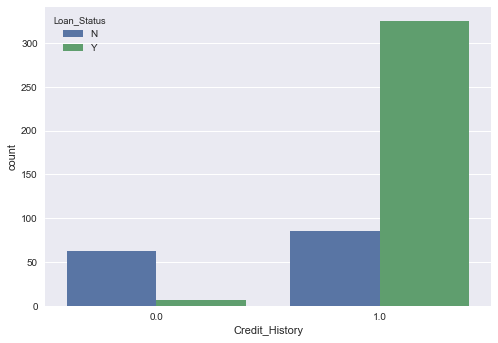

In [14]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

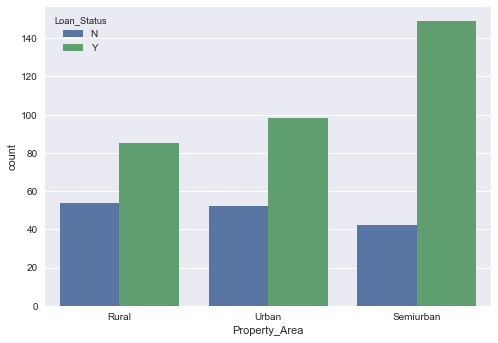

In [15]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

C:\Users\GT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


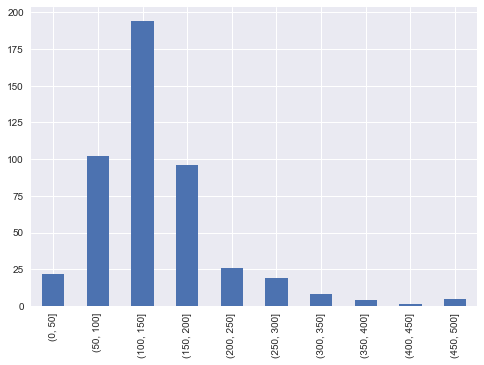

In [16]:
bins=[0,50,100,150,200,250,300,350,400,450,500]
df['Loans']=pd.cut(df['LoanAmount'],bins)
df['Loans'].value_counts().sort_index().plot.bar()

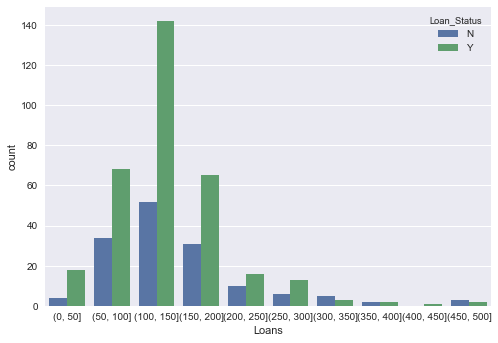

In [17]:
sns.countplot(x='Loans', hue='Loan_Status', data=df)

C:\Users\GT\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


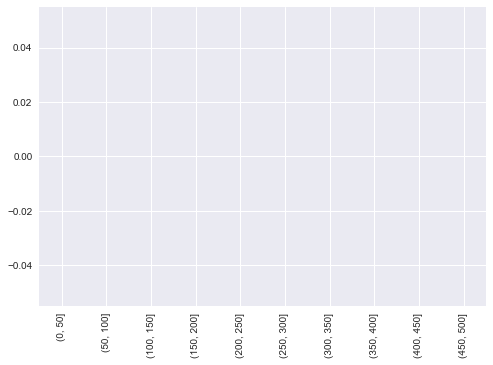

In [18]:
df[(df['LoanAmount']>=144)&(df['Credit_History']=='Male')]['Loans'].value_counts().sort_index().plot(kind='bar')

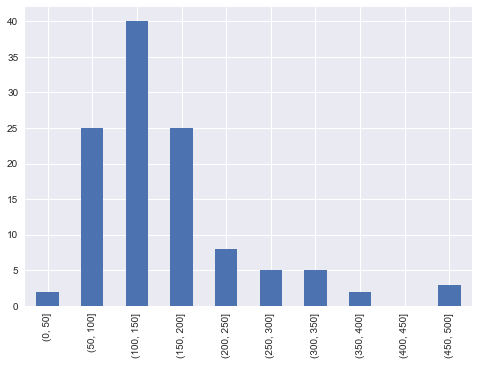

In [19]:
df[(df['Loan_Status']=='N')&(df['Gender']=='Male')]['Loans'].value_counts().sort_index().plot(kind='bar')

# Loan Status on basis of Graduation and Gender


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


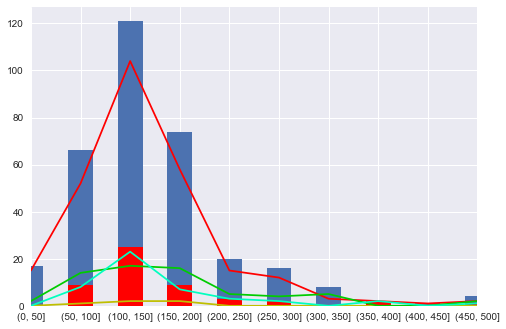

In [20]:
df[(df['Education']=='Graduate')&(df['Credit_History']==1.0)]['Loans'].value_counts().sort_index().plot(kind='bar')
df[(df['Education']=='Graduate')&(df['Credit_History']==0)]['Loans'].value_counts().sort_index().plot(kind='bar',color='red')
print(df[(df['Education']=='Graduate')&(df['Credit_History']==1.0)&(df['Loan_Status']=='Y')]['Loans'].value_counts().sort_index().plot(kind='line',color='r'))
print(df[(df['Education']=='Graduate')&(df['Credit_History']==0)&(df['Loan_Status']=='Y')]['Loans'].value_counts().sort_index().plot(kind='line',color='y'))
print(df[(df['Education']=='Graduate')&(df['Credit_History']==1.0)&(df['Loan_Status']=='N')]['Loans'].value_counts().sort_index().plot(kind='line',color='#00cc00'))
print(df[(df['Education']=='Graduate')&(df['Credit_History']==0)&(df['Loan_Status']=='N')]['Loans'].value_counts().sort_index().plot(kind='line',color='#00ffbf'))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


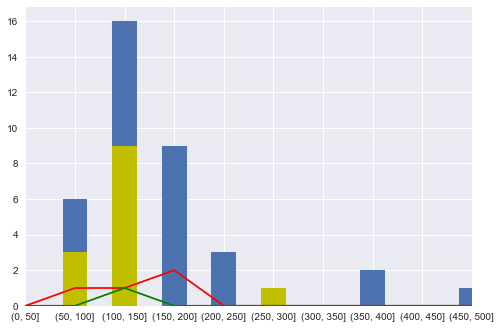

In [21]:
df[(df['Education']=='Graduate')&(df['Credit_History']==0)&(df['Gender']=='Male')]['Loans'].value_counts().sort_index().plot(kind='bar')
print(df[(df['Education']=='Graduate')&(df['Credit_History']==0)&(df['Loan_Status']=='Y')&(df['Gender']=='Male')]['Loans'].value_counts().sort_index().plot(kind='line',color='r'))
df[(df['Education']=='Graduate')&(df['Credit_History']==0)&(df['Gender']!='Male')]['Loans'].value_counts().sort_index().plot(kind='bar',color='y')
print(df[(df['Education']=='Graduate')&(df['Credit_History']==0)&(df['Loan_Status']=='Y')&(df['Gender']!='Male')]['Loans'].value_counts().sort_index().plot(kind='line',color='g'))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


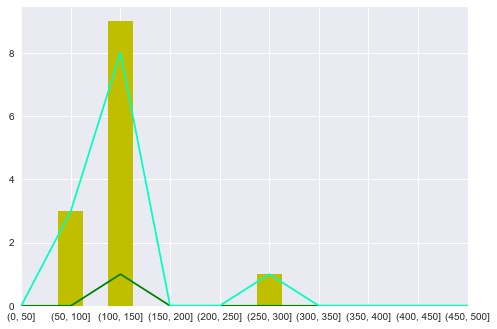

In [22]:
df[(df['Education']=='Graduate')&(df['Credit_History']==0)&(df['Gender']!='Male')]['Loans'].value_counts().sort_index().plot(kind='bar',color='y')
print(df[(df['Education']=='Graduate')&(df['Credit_History']==0)&(df['Loan_Status']=='Y')&(df['Gender']!='Male')]['Loans'].value_counts().sort_index().plot(kind='line',color='g'))
print(df[(df['Education']=='Graduate')&(df['Credit_History']==0)&(df['Loan_Status']=='N')&(df['Gender']!='Male')]['Loans'].value_counts().sort_index().plot(kind='line',color='#00ffbf'))

# Loan For Not Graduate


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


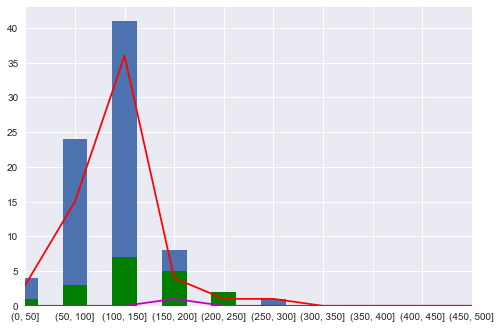

In [23]:
df[(df['Education']=='Not Graduate')&(df['Credit_History']==1.0)]['Loans'].value_counts().sort_index().plot(kind='bar',x='loan amount',y='count for credit score 1')
print(df[(df['Education']=='Not Graduate')&(df['Credit_History']==1.0)&(df['Loan_Status']=='Y')]['Loans'].value_counts().sort_index().plot(kind='line',color='r'))
df[(df['Education']=='Not Graduate')&(df['Credit_History']==0)]['Loans'].value_counts().sort_index().plot(kind='bar',color='g',x='loan amount',y='count for credit score 0')
print(df[(df['Education']=='Not Graduate')&(df['Credit_History']==0)&(df['Loan_Status']=='Y')]['Loans'].value_counts().sort_index().plot(kind='line',color='m'))


AxesSubplot(0.125,0.125;0.775x0.755)


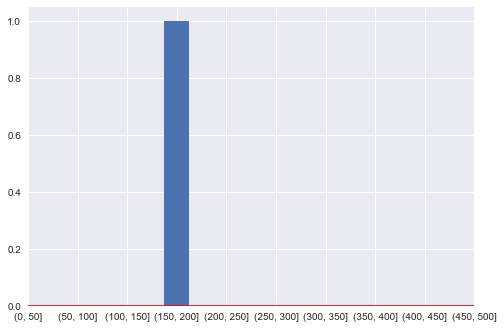

In [24]:
df[(df['Education']=='Not Graduate')&(df['Credit_History']==0)&(df['Gender']!='Male')]['Loans'].value_counts().sort_index().plot(kind='bar')
print(df[(df['Education']=='Not Graduate')&(df['Credit_History']==0)&(df['Loan_Status']=='Y')&(df['Gender']!='Male')]['Loans'].value_counts().sort_index().plot(kind='line',color='r'))

AxesSubplot(0.125,0.125;0.775x0.755)


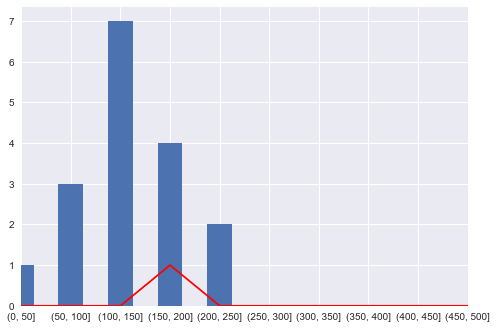

In [25]:
df[(df['Education']=='Not Graduate')&(df['Credit_History']==0)&(df['Gender']=='Male')]['Loans'].value_counts().sort_index().plot(kind='bar')
print(df[(df['Education']=='Not Graduate')&(df['Credit_History']==0)&(df['Loan_Status']=='Y')&(df['Gender']=='Male')]['Loans'].value_counts().sort_index().plot(kind='line',color='r'))

# On the basis of Self Employed

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


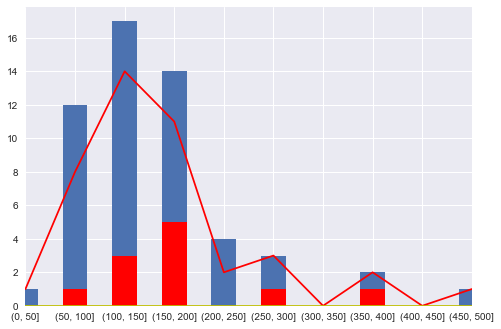

In [26]:
df[(df['Self_Employed']=='Yes')&(df['Credit_History']==1.0)]['Loans'].value_counts().sort_index().plot(kind='bar')
df[(df['Self_Employed']=='Yes')&(df['Credit_History']==0)]['Loans'].value_counts().sort_index().plot(kind='bar',color='red')
print(df[(df['Self_Employed']=='Yes')&(df['Credit_History']==1.0)&(df['Loan_Status']=='Y')]['Loans'].value_counts().sort_index().plot(kind='line',color='r'))
print(df[(df['Self_Employed']=='Yes')&(df['Credit_History']==0)&(df['Loan_Status']=='Y')]['Loans'].value_counts().sort_index().plot(kind='line',color='y'))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


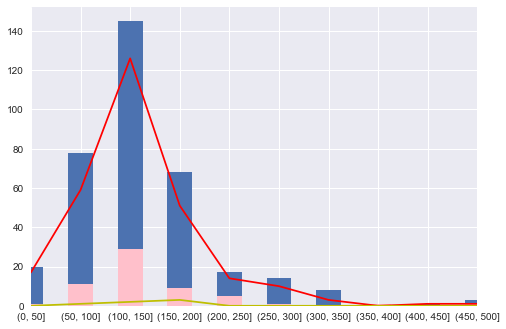

In [27]:
df[(df['Self_Employed']=='No')&(df['Credit_History']==1.0)]['Loans'].value_counts().sort_index().plot(kind='bar')
df[(df['Self_Employed']=='No')&(df['Credit_History']==0)]['Loans'].value_counts().sort_index().plot(kind='bar',color='pink')
print(df[(df['Self_Employed']=='No')&(df['Credit_History']==1.0)&(df['Loan_Status']=='Y')]['Loans'].value_counts().sort_index().plot(kind='line',color='r'))
print(df[(df['Self_Employed']=='No')&(df['Credit_History']==0)&(df['Loan_Status']=='Y')]['Loans'].value_counts().sort_index().plot(kind='line',color='y'))

In [30]:
train_df_encoded = pd.get_dummies(df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,...,Loan_Status_Y,"Loans_(50, 100]","Loans_(100, 150]","Loans_(150, 200]","Loans_(200, 250]","Loans_(250, 300]","Loans_(300, 350]","Loans_(350, 400]","Loans_(400, 450]","Loans_(450, 500]"
1,4583,1508.0,128.0,360.0,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,2583,2358.0,120.0,360.0,1.0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,6000,0.0,141.0,360.0,1.0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
5,5417,4196.0,267.0,360.0,1.0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [31]:
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

In [39]:
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

In [40]:
#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    


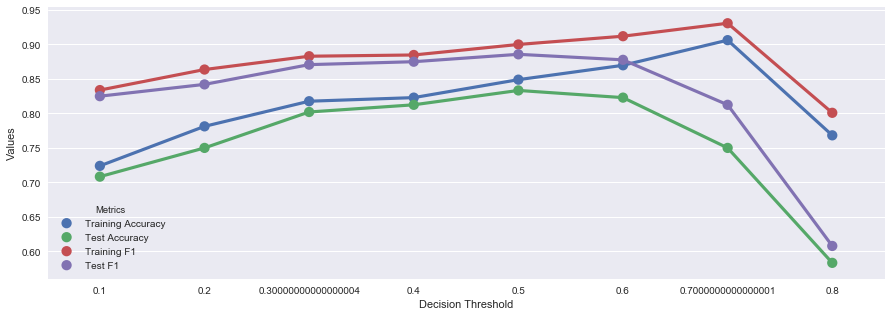

In [41]:
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [43]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))


Test Accuracy:  0.8125
Test F1 Score:  0.875


In [44]:
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,15,15,30
1,3,63,66
All,18,78,96
